<a href="https://colab.research.google.com/github/MilagrosLG/GENOMICA/blob/main/notebooks/3_SNPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧬 Análisis básico de SNPs en plantas usando datos de NCBI

Este notebook guía el análisis simple de SNPs del gen BRCA1 _Homo sapiens_ usando datos de NCBI. Objetivo: Aprender a recuperar datos de SNPs desde NCBI usando Biopython y realizar un análisis exploratorio básico.

## 📦  1. Importar librerías necesarias

In [1]:
# 🔧 Librerías para acceder a NCBI y manejar datos

# 📘 Instalación de Biopython
!pip install biopython

from Bio import Entrez
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 📧 Configurar tu correo electrónico (requerido por NCBI)
Entrez.email = "milagrosleivagalarza@gmail.com"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.4 MB/s eta 0:00:00


## 🏵 2. Obtener la data necesaria

In [18]:
# 🧪 Buscar SNPs en BRCA1 en humanos
search_term = "BRCA1 AND Homo sapiens[Organism]"
handle = Entrez.esearch(db="snp", term=search_term, retmax=50)
record = Entrez.read(handle)
handle.close()

# 📋 Mostrar los IDs encontrados
snp_ids = record["IdList"]
print("🔎 SNP IDs encontrados:", snp_ids)



🔎 SNP IDs encontrados: ['2552282559', '2552281972', '2552281880', '2552281808', '2552281780', '2552281763', '2552281739', '2552281738', '2552281728', '2552281725', '2552281715', '2552281691', '2552281468', '2552281431', '2552281423', '2552281410', '2552281409', '2552281374', '2552281365', '2552281348', '2552281315', '2552281298', '2552281296', '2552281235', '2552281223', '2552281215', '2552281183', '2552281158', '2552281116', '2552281083', '2552281043', '2552281000', '2552280993', '2552280950', '2552280942', '2552280930', '2552280920', '2552280908', '2552280895', '2552280890', '2552280883', '2552280863', '2552280857', '2552280819', '2552280806', '2552280777', '2552280737', '2552280703', '2552280690', '2552280655']



## 📊 3. Obtención de SNPs y parseo de ellos


In [19]:
# Obtener los SNP records
if snp_ids:
 handle = Entrez.efetch(db="snp", id=",".join(snp_ids), rettype="xml")
 snp_data = handle.read()
 handle.close()
 print(snp_data[:1000])  # Ver los primeros 1000 characters

print(snp_data[:2000])  # 👀 Vista previa del XML

b'<?xml version="1.0" ?>\n<ExchangeSet xmlns:xsi="https://www.w3.org/2001/XMLSchema-instance" xmlns="https://www.ncbi.nlm.nih.gov/SNP/docsum" xsi:schemaLocation="https://www.ncbi.nlm.nih.gov/SNP/docsum ftp://ftp.ncbi.nlm.nih.gov/snp/specs/docsum_eutils.xsd" ><DocumentSummary uid="2552282559"><SNP_ID>2552282559</SNP_ID><ALLELE_ORIGIN/><GLOBAL_MAFS><MAF><STUDY>TOMMO</STUDY><FREQ>C=0.00001/1</FREQ></MAF></GLOBAL_MAFS><GLOBAL_POPULATION/><GLOBAL_SAMPLESIZE>0</GLOBAL_SAMPLESIZE><SUSPECTED/><CLINICAL_SIGNIFICANCE/><GENES><GENE_E><NAME>BRCA1</NAME><GENE_ID>672</GENE_ID></GENE_E><GENE_E><NAME>NBR2</NAME><GENE_ID>10230</GENE_ID></GENE_E></GENES><ACC>NC_000017.11</ACC><CHR>17</CHR><HANDLE>TOMMO_GENOMICS</HANDLE><SPDI>NC_000017.11:43127348:G:C</SPDI><FXN_CLASS>upstream_transcript_variant,2KB_upstream_variant,intron_variant</FXN_CLASS><VALIDATED>by-frequency</VALIDATED><DOCSUM>HGVS=NC_000017.11:g.43127349G&gt;C,NC_000017.10:g.41279366G&gt;C,NG_005905.2:g.90635C&gt;G,NG_056086.2:g.2955G&gt;C|SEQ=[G

In [21]:
# Parsear el XML correctamente
root = ET.fromstring(snp_data)
snp_info = []

# Buscar cada resumen de SNP
for doc in root.findall(".//{https://www.ncbi.nlm.nih.gov/SNP/docsum}DocumentSummary"):
    snp_id = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_ID")
    snp_class = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}SNP_CLASS")
    chrpos = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}CHRPOS")
    fxn_class = doc.find("{https://www.ncbi.nlm.nih.gov/SNP/docsum}FXN_CLASS")

    snp_info.append({
        "SNP_ID": snp_id.text if snp_id is not None else None,
        "SNP_CLASS": snp_class.text if snp_class is not None else None,
        "CHRPOS": chrpos.text if chrpos is not None else None,
        "FXN_CLASS": fxn_class.text if fxn_class is not None else None
    })

# Convertir a DataFrame
df_snps = pd.DataFrame(snp_info)
df_snps.head()


,SNP_ID,SNP_CLASS,CHRPOS,FXN_CLASS
0,2552282559,snv,17:43127349,"upstream_transcript_variant,2KB_upstream_varia..."
1,2552281972,snv,17:43127232,"upstream_transcript_variant,2KB_upstream_varia..."
2,2552281880,del,17:43127053,"upstream_transcript_variant,2KB_upstream_varia..."
3,2552281808,snv,17:43126996,"upstream_transcript_variant,2KB_upstream_varia..."
4,2552281780,snv,17:43126982,"upstream_transcript_variant,2KB_upstream_varia..."


## 🧬 4. Clasificar SNPs por tipo (SNP_CLASS)

🧬 Distribución de clases de SNPs:
SNP_CLASS
snv       41
delins     5
del        4
Name: count, dtype: int64


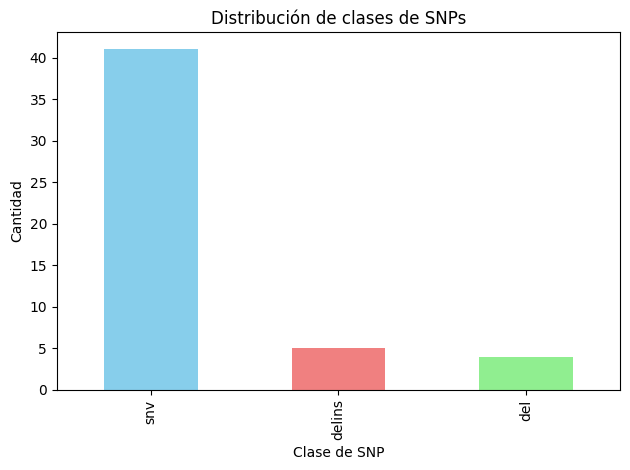

In [22]:
print("🧬 Distribución de clases de SNPs:")
snp_class_counts = df_snps["SNP_CLASS"].value_counts()
print(snp_class_counts)

# Definir una lista de colores (asegúrate de que haya suficientes colores para todas las clases)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orchid']

# Visualización
snp_class_counts.plot(kind='bar', title='Distribución de clases de SNPs', color=colors)
plt.xlabel("Clase de SNP")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## 🔬 5. Analizar la función genética (FXN_CLASS)

🔬 Clases funcionales de SNPs:
FXN_CLASS
upstream_transcript_variant      50
2KB_upstream_variant             50
intron_variant                   29
non_coding_transcript_variant     8
splice_donor_variant              1
Name: count, dtype: int64


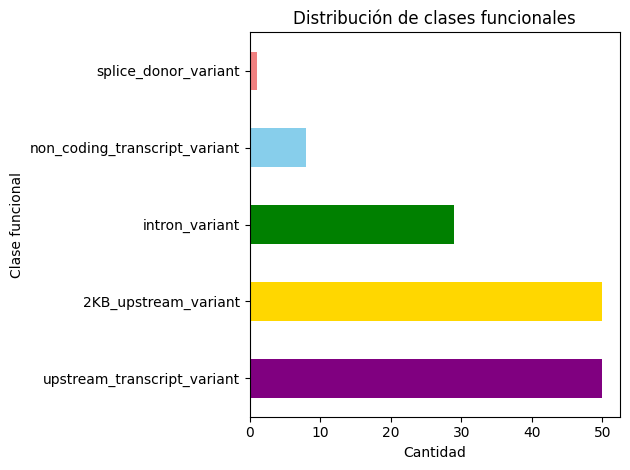

In [24]:

print("🔬 Clases funcionales de SNPs:")
fxn_counts = df_snps["FXN_CLASS"].str.split(",").explode().value_counts()
print(fxn_counts)

colors = ['purple', 'gold', 'green','skyblue','lightcoral']

# Visualización
fxn_counts.plot(kind='barh', title='Distribución de clases funcionales', color=colors)
plt.xlabel("Cantidad")
plt.ylabel("Clase funcional")
plt.tight_layout()
plt.show()


## 🧭 6. Filtrar SNPs en regiones específicas (upstream)

In [25]:

print("🧭 SNPs en regiones upstream:")
upstream_snps = df_snps[df_snps["FXN_CLASS"].str.contains("upstream", case=False, na=False)]
print(upstream_snps)


🧭 SNPs en regiones upstream:
        SNP_ID SNP_CLASS       CHRPOS  \
0   2552282559       snv  17:43127349   
1   2552281972       snv  17:43127232   
2   2552281880       del  17:43127053   
3   2552281808       snv  17:43126996   
4   2552281780       snv  17:43126982   
5   2552281763       snv  17:43126949   
6   2552281739       snv  17:43126883   
7   2552281738    delins  17:43126881   
8   2552281728    delins  17:43126843   
9   2552281725       snv  17:43126831   
10  2552281715       snv  17:43126813   
11  2552281691       snv  17:43126774   
12  2552281468       snv  17:43126469   
13  2552281431       snv  17:43126366   
14  2552281423       snv  17:43126332   
15  2552281410       snv  17:43126273   
16  2552281409    delins  17:43126271   
17  2552281374       snv  17:43126197   
18  2552281365       snv  17:43126177   
19  2552281348       snv  17:43126156   
20  2552281315       snv  17:43126097   
21  2552281298       snv  17:43126040   
22  2552281296       snv  17


## 🧠 7. Preguntas de interpretación
- ¿Qué implicaciones evolutivas puede tener la presencia de SNPs en regiones upstream o intrónicas?

Al ubicarse en regiones que no se expresan podrían evadir fuerzas evolutivas y pasar de generación en generación de manera "silenciosa". De esta manera su precencia podría servir como un marcador para contrastar el paso del tiempo entre organismos.

- ¿Qué tipos de variantes esperarías encontrar en regiones codificantes vs. no codificantes?


- ¿Qué importancia tiene que varios SNPs estén agrupados en una misma región cromosómica? ¿Podría indicar un hotspot de variación?
